In [102]:
import os
os.chdir("C:\\Users\\Owner\\Desktop\\새 폴더")
print(os.getcwd())

C:\Users\Owner\Desktop\새 폴더


In [103]:
import numpy as np
import statsmodels as stats
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import seaborn as sns

In [104]:
a = pd.read_csv("train123.csv")
a.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,target
0,0,1974,Master,Together,46014.0,1,1,21-01-2013,21,10,...,8,7,0,0,0,0,0,0,0,541
1,1,1962,Graduation,Single,76624.0,0,1,24-05-2014,68,1,...,7,1,1,0,0,0,0,0,0,899
2,2,1951,Graduation,Married,75903.0,0,1,08-04-2013,50,2,...,9,3,0,0,0,0,0,0,0,901
3,3,1974,Basic,Married,18393.0,1,0,29-03-2014,2,2,...,3,8,0,0,0,0,0,0,0,50
4,4,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,5,7,0,0,0,1,0,0,0,444


In [105]:
print(a.columns)

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'target'],
      dtype='object')


In [106]:
a.columns = ['id','birth','edu','maritial','income','kid','teen','dt_cus','recency','sales',
             'webpur','catalog','store','webvisit','cmp3','cmp4','cmp5','cmp1','cmp2',
             'complain','response','target'] # 변수명 지정

In [107]:
print(f'변경한 변수명:{a.columns}')

변경한 변수명:Index(['id', 'birth', 'edu', 'maritial', 'income', 'kid', 'teen', 'dt_cus',
       'recency', 'sales', 'webpur', 'catalog', 'store', 'webvisit', 'cmp3',
       'cmp4', 'cmp5', 'cmp1', 'cmp2', 'complain', 'response', 'target'],
      dtype='object')


# 결측치가 없음

In [108]:
print(a.info()) #전체 데이터형 파악

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1108 non-null   int64  
 1   birth     1108 non-null   int64  
 2   edu       1108 non-null   object 
 3   maritial  1108 non-null   object 
 4   income    1108 non-null   float64
 5   kid       1108 non-null   int64  
 6   teen      1108 non-null   int64  
 7   dt_cus    1108 non-null   object 
 8   recency   1108 non-null   int64  
 9   sales     1108 non-null   int64  
 10  webpur    1108 non-null   int64  
 11  catalog   1108 non-null   int64  
 12  store     1108 non-null   int64  
 13  webvisit  1108 non-null   int64  
 14  cmp3      1108 non-null   int64  
 15  cmp4      1108 non-null   int64  
 16  cmp5      1108 non-null   int64  
 17  cmp1      1108 non-null   int64  
 18  cmp2      1108 non-null   int64  
 19  complain  1108 non-null   int64  
 20  response  1108 non-null   int6

In [109]:
print(a.isnull().sum())

id          0
birth       0
edu         0
maritial    0
income      0
kid         0
teen        0
dt_cus      0
recency     0
sales       0
webpur      0
catalog     0
store       0
webvisit    0
cmp3        0
cmp4        0
cmp5        0
cmp1        0
cmp2        0
complain    0
response    0
target      0
dtype: int64


# 범주값인지 확인

In [110]:
print(a['edu'].unique())
print(a['cmp1'].unique())
print(a['maritial'].unique())
print(a['complain'].unique())
print(a['response'].unique()) # 각 단어의 뜻을 알아야 함.

['Master' 'Graduation' 'Basic' 'PhD' '2n Cycle']
[0 1]
['Together' 'Single' 'Married' 'Widow' 'Divorced' 'Alone' 'YOLO' 'Absurd']
[0 1]
[0 1]


In [111]:
a_copy = a.copy()

In [112]:
a_copy.describe()

,id,birth,income,kid,teen,recency,sales,webpur,catalog,store,webvisit,cmp3,cmp4,cmp5,cmp1,cmp2,complain,response,target
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.00000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000
mean,553.500000,1968.701264,52075.809567,0.429603,0.511733,50.156137,2.33935,4.184116,2.690433,5.905235,5.348375,0.069495,0.085740,0.072202,0.068592,0.015343,0.009025,0.141697,617.121841
std,319.996354,12.225380,21310.093395,0.545582,0.551624,29.085582,1.94328,2.810556,2.792236,3.306812,2.405115,0.254408,0.280106,0.258939,0.252873,0.122968,0.094614,0.348896,603.587972
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,276.750000,1959.000000,35768.500000,0.000000,0.000000,25.000000,1.00000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000
50%,553.500000,1970.000000,51609.500000,0.000000,0.000000,51.000000,2.00000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,412.000000
75%,830.250000,1977.000000,68325.000000,1.000000,1.000000,76.000000,3.00000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1068.750000
max,1107.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,15.00000,27.000000,11.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


In [113]:
a['dt_cus']

0       21-01-2013
1       24-05-2014
2       08-04-2013
3       29-03-2014
4       10-06-2014
           ...    
1103    31-03-2013
1104    21-10-2013
1105    16-12-2013
1106    30-05-2013
1107    29-10-2012
Name: dt_cus, Length: 1108, dtype: object

In [114]:
a_copy['dt_cus'] = pd.to_datetime(a['dt_cus']) # 년,월,일 분리 및 시간순으로 나타내기 위해 데이트타임으로 변경

In [115]:
a_copy.describe(include = ['object','category'])

,edu,maritial
count,1108,1108
unique,5,8
top,Graduation,Married
freq,570,415


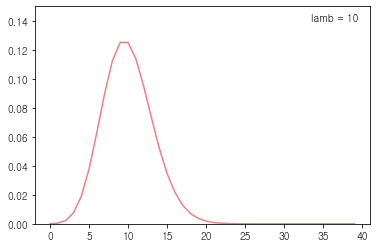

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp

# Probability density of the Poisson distribution
def pois_dist(n, lamb):
    pd = (lamb ** n) * exp(-lamb) / factorial(n)
    return pd


x = np.arange(40)
pd1 = np.array([pois_dist(n, 10) for n in range(40)])
plt.ylim(0, 0.15)
plt.text(33.5, 0.14, 'lamb = 10')
plt.plot(x, pd1, color='lightcoral')
plt.show() # 포아송분포임을 확인함

import numpy as np
import matplotlib.pyplot as plt
from math import factorial, exp

In [117]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


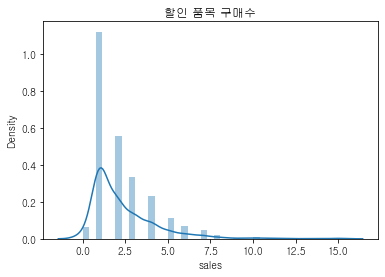

In [118]:
sns.distplot(a_copy['sales'])
plt.title('할인 품목 구매수')
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


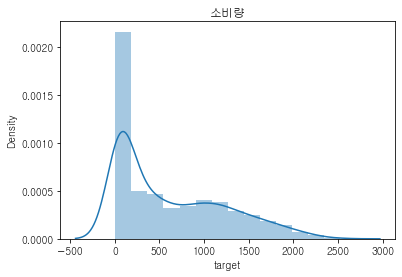

In [119]:
sns.distplot(a_copy['target'])
plt.title('소비량')
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


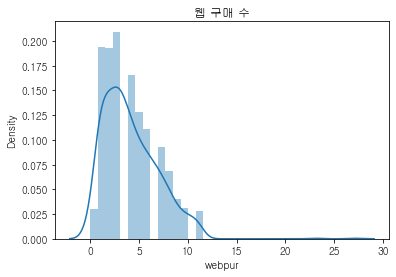

In [120]:
sns.distplot(a_copy['webpur'])
plt.title('웹 구매 수')
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


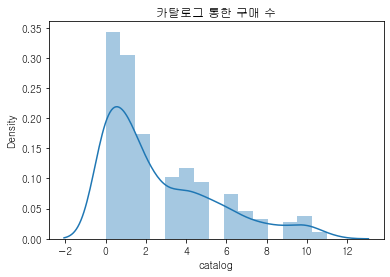

In [121]:
sns.distplot(a_copy['catalog'])
plt.title('카탈로그 통한 구매 수')
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


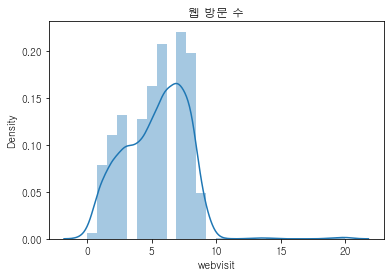

In [122]:
sns.distplot(a_copy['webvisit'])
plt.title('웹 방문 수')
plt.show()

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


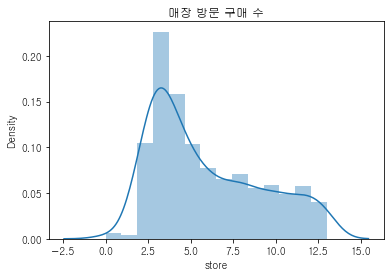

In [123]:
sns.distplot(a_copy['store'])
plt.title('매장 방문 구매 수')
plt.show()

# 포아송분포 
- 등분산성을 만족하면 안됨 검정 해줌
- 정규성 만족하는지 안하는지 따라
- 정규성 만족: Bartlett - Test
- 정규성 만족하지 못하면: Levene - Test

In [124]:
# 정규성 검정해주기
from scipy.stats import shapiro
print('''
귀무가설 H0: 데이터셋이 정규분포를 따른다.
대립가설 H1: 데이터셋이 정규분포를 따르지 않는다.
''')

통계량,pval=shapiro(a['income'])
print(f'income 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['birth'])
print(f'birth 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['recency'])
print(f'recency 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['kid'])
print(f'kid 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['teen'])
print(f'teen 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['sales'])
print(f'sales 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['webpur'])
print(f'webpur 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['catalog'])
print(f'catalog 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['store'])
print(f'store 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['webvisit'])
print(f'webvisit 레빈 계수:{통계량},유의확률:{pval})')
print('========'*10)
통계량,pval=shapiro(a['target'])
print(f'target 레빈 계수:{통계량},유의확률:{pval})')
print('\n')
print('모두 정규성을 만족하지 못함')


귀무가설 H0: 데이터셋이 정규분포를 따른다.
대립가설 H1: 데이터셋이 정규분포를 따르지 않는다.

income 레빈 계수:0.9784586429595947,유의확률:9.067319811650876e-12)
birth 레빈 계수:0.9727323651313782,유의확률:1.3710502188863521e-13)
recency 레빈 계수:0.9522725939750671,유의확률:1.6803879460921535e-18)
kid 레빈 계수:0.6746238470077515,유의확률:1.1462621438177004e-41)
teen 레빈 계수:0.69938063621521,유의확률:1.616481856506536e-40)
sales 레빈 계수:0.7539214491844177,유의확률:1.0996871307069978e-37)
webpur 레빈 계수:0.9059257507324219,유의확률:1.4355106503104044e-25)
catalog 레빈 계수:0.85223788022995,유의확률:5.955000778723311e-31)
store 레빈 계수:0.9040588736534119,유의확률:8.591599366409912e-26)
webvisit 레빈 계수:0.9296861886978149,유의확률:2.1843492832342503e-22)
target 레빈 계수:0.8695711493492126,유의확률:2.0726594750760848e-29)


모두 정규성을 만족하지 못함


In [125]:
#%%
# 등분산검정
print('''
      H_{0} : 등분산성을 만족한다
      H_{1} : 등분산성을 만족하지 못한다
      ''')

from scipy.stats import levene
sta,pval=levene(a['income'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['birth'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['income'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['recency'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['kid'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['teen'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['sales'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['webpur'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['catalog'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['store'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')
print('========'*10)
sta,pval=levene(a['webvisit'],a['target'])
print(f'레빈 계수:{sta},유의확률:{pval})')



      H_{0} : 등분산성을 만족한다
      H_{1} : 등분산성을 만족하지 못한다
      
레빈 계수:2303.0184317944445,유의확률:0.0)
레빈 계수:1679.9296178633826,유의확률:9.195819682650659e-274)
레빈 계수:2303.0184317944445,유의확률:0.0)
레빈 계수:1575.480565891293,유의확률:1.1054057203294415e-260)
레빈 계수:1746.155394764016,유의확률:7.096661669432355e-282)
레빈 계수:1745.5797072166717,유의확률:8.336576990368346e-282)
레빈 계수:1740.0414778063657,유의확률:3.929019365884687e-281)
레빈 계수:1733.8103496979131,유의확률:2.253968321206237e-280)
레빈 계수:1734.1133734075627,유의확률:2.0702642669529035e-280)
레빈 계수:1730.173700071103,유의확률:6.255731145797619e-280)
레빈 계수:1735.5832674132228,유의확률:1.3707754968978938e-280)


- 포아송분포 사용 가능

# income의 이상치

In [126]:
print(a['income'].describe())

count      1108.000000
mean      52075.809567
std       21310.093395
min        1730.000000
25%       35768.500000
50%       51609.500000
75%       68325.000000
max      162397.000000
Name: income, dtype: float64


In [127]:
print(f'low이상치:{35768.5-(1.5*(68325-35768.5))}')
print(f'high이상치:{68325+(1.5*(68325-35768.5))}')

low이상치:-13066.25
high이상치:117159.75


In [128]:
a_copy.columns

Index(['id', 'birth', 'edu', 'maritial', 'income', 'kid', 'teen', 'dt_cus',
       'recency', 'sales', 'webpur', 'catalog', 'store', 'webvisit', 'cmp3',
       'cmp4', 'cmp5', 'cmp1', 'cmp2', 'complain', 'response', 'target'],
      dtype='object')

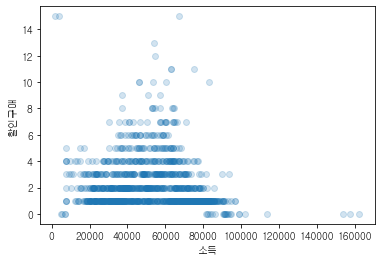

In [129]:
plt.scatter(a_copy['income'],a_copy['sales'],alpha=0.2)
plt.xlabel('소득')
plt.ylabel('할인구매')
plt.show() # 양의 상관성

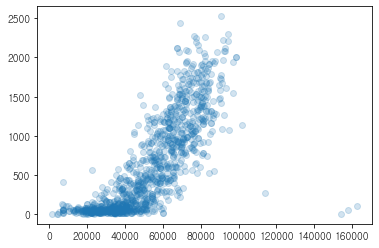

In [130]:
plt.scatter(a['income'],a['target'],alpha=0.2)
plt.show()

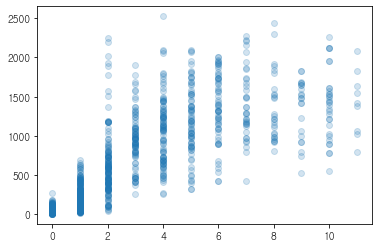

In [131]:
plt.scatter(a_copy['catalog'],a_copy['target'],alpha=0.2)
plt.show()

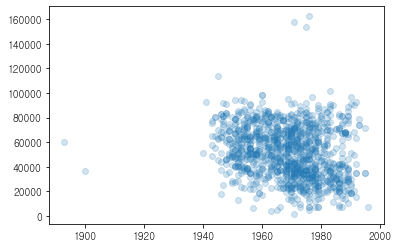

In [132]:
plt.scatter(a_copy['birth'],a_copy['income'],alpha=0.2)
plt.show()

### 카탈로그는 상품을 구매할 것이 예상되는 손님에게 구입상 참고가 될 만한 사항을 나타내 보이는 것. (특징,가격,사진 등)
### 소비량과 카탈로그의 구매수를 상관계수가 높은 것을 볼 수 있는데 참고가 될 만한 것들이 있을수록 더 많이 구매하는 것으로 생각할 수 있다. 

## 소비량과 매장에서 직접 구매한 수도 상관계수가 높은데 매장에서 직접 제품을 보는 것은 카탈로그가 제공되는 것이기 때문에 카탈로그를 만들어 주는게 좋다.

- 피어슨은 연속형 연속형에 정규성을 만족하는 변수들에 대하여 구해주는 것
- 앞에 과정에서 정규성을 검정했을 때 

- 결국 정규성을 만족하지 않아 비모수적 방법인 스피어만 상관계수로 분석함

In [133]:
pear_r,pear_pval = stats.spearmanr(a_copy['birth'],a_copy['income'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:-0.23543150121737183,유의확률:2.0260652093645097e-15


- 이상치 소득을 가진 사람들은 캠페인 참여도 적고 소비량도 작아서 별로 필요없는 애들이라 판단함

In [134]:
print(a_copy[a_copy['income']>=117159.75][['cmp1','cmp2','cmp3','cmp4','cmp5','response','target']])

     cmp1  cmp2  cmp3  cmp4  cmp5  response  target
246     0     0     0     0     0         0     107
686     0     0     0     0     0         0       6
730     0     0     0     0     0         0      59


In [135]:
pear_r,pear_pval = stats.kendalltau(a_copy['income'],a_copy['sales'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:-0.1361638829928517,유의확률:8.637342701705195e-10


- 유의확률은 0.000으로 귀무가설 기각 상관성이 있으며 상관계수는 -0.136으로 음의 상관계수가 존재한다.

In [136]:
pear_r,pear_pval = stats.kendalltau(a_copy['income'],a_copy['target'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:0.6553694046063225,유의확률:9.788145116043386e-234


- 유의확률은 0.000으로 귀무가설 기각 상관성이 있으며 상관계수는 0.78으로 양의 상관계수가 존재한다

In [137]:
pear_r,pear_pval = stats.kendalltau(a_copy['catalog'],a_copy['target'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:0.7317731228914435,유의확률:9.901925557111417e-255


- 유의확률은 0.000으로 귀무가설 기각 상관성이 있으며 상관계수는 0.80으로 양의 상관계수가 존재한다

In [138]:
pear_r,pear_pval = stats.kendalltau(a_copy['store'],a_copy['target'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:0.6306431772257192,유의확률:2.4393212902544775e-196


- 유의확률은 0.000으로 귀무가설 기각 상관성이 있으며 상관계수는 0.68으로 양의 상관계수가 존재한다

In [139]:
pear_r,pear_pval = stats.kendalltau(a_copy['webvisit'],a_copy['webpur'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:-0.07896995033355966,유의확률:0.0004243707228330622


In [140]:
pear_r,pear_pval = stats.kendalltau(a_copy['webvisit'],a_copy['income'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:-0.4869350467605102,유의확률:3.746655589180171e-116


In [141]:
pear_r,pear_pval = stats.kendalltau(a_copy['birth'],a_copy['income'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:-0.16350544802772524,유의확률:7.830201401681893e-16


- 유의확률은 0.004으로 귀무가설 기각 상관성이 있으며 상관계수는 -0.08으로 음의 상관계수가 존재한다

- 웹 방문 상관계수 넣고 이유 설명해주기

In [142]:
a_del = a_copy.copy()
a_del = a_del[a_del['income']<117159.75]
a_del=a_del.drop(['webvisit'],axis=1)
a_del.shape

(1105, 21)

- 이상치 3개 제거

In [143]:
#%%
conditionlist = [
    (a_del['birth'] >= 1890) & (a_del['birth'] < 1900),
    (a_del['birth'] >= 1900) & (a_del['birth'] < 1910),
    (a_del['birth'] >= 1910) & (a_del['birth'] < 1920),
    (a_del['birth'] >= 1920) & (a_del['birth'] < 1930),
    (a_del['birth'] >= 1930) & (a_del['birth'] < 1940),
    (a_del['birth'] >= 1940) & (a_del['birth'] < 1950),
    (a_del['birth'] >= 1950) & (a_del['birth'] < 1960),
    (a_del['birth'] >= 1960) & (a_del['birth'] < 1970),
    (a_del['birth'] >= 1970) & (a_del['birth'] < 1980),
    (a_del['birth'] >= 1980) & (a_del['birth'] < 1990),
    (a_del['birth'] >= 1990) & (a_del['birth'] < 2000)]
choicelist = ['1890년대 출생', '1900년대 출생','1910년대 출생','1920년대 출생','1930년대 출생',
              '1940년대 출생','1950년대 출생','1960년대 출생','1970년대 출생','1980년대 출생',
              '1990년대 출생']
a_del['birth_level'] = np.select(conditionlist, choicelist,default=0)
print(a_del.head())

   id  birth         edu  maritial   income  kid  teen     dt_cus  recency  \
0   0   1974      Master  Together  46014.0    1     1 2013-01-21       21   
1   1   1962  Graduation    Single  76624.0    0     1 2014-05-24       68   
2   2   1951  Graduation   Married  75903.0    0     1 2013-08-04       50   
3   3   1974       Basic   Married  18393.0    1     0 2014-03-29        2   
4   4   1946         PhD  Together  64014.0    2     1 2014-10-06       56   

   sales  ...  store  cmp3  cmp4  cmp5  cmp1  cmp2  complain  response  \
0     10  ...      8     0     0     0     0     0         0         0   
1      1  ...      7     1     0     0     0     0         0         0   
2      2  ...      9     0     0     0     0     0         0         0   
3      2  ...      3     0     0     0     0     0         0         0   
4      7  ...      5     0     0     0     1     0         0         0   

   target  birth_level  
0     541    1970년대 출생  
1     899    1960년대 출생  
2     901  

In [144]:
pear_r,pear_pval = stats.kendalltau(a_del['birth'],a_del['income'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:-0.16595813032845302,유의확률:3.165326098878036e-16


In [145]:
pear_r,pear_pval = stats.kendalltau(a_del['income'],a_del['target'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:0.6624728675817441,유의확률:3.8552138566395597e-238


In [146]:
pear_r,pear_pval = stats.kendalltau(a_del['catalog'],a_del['target'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:0.7315590286150044,유의확률:5.4858411931504315e-254


In [147]:
pear_r,pear_pval = stats.kendalltau(a_del['income'],a_del['sales'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:-0.13083826292478826,유의확률:4.048446789335438e-09


In [148]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

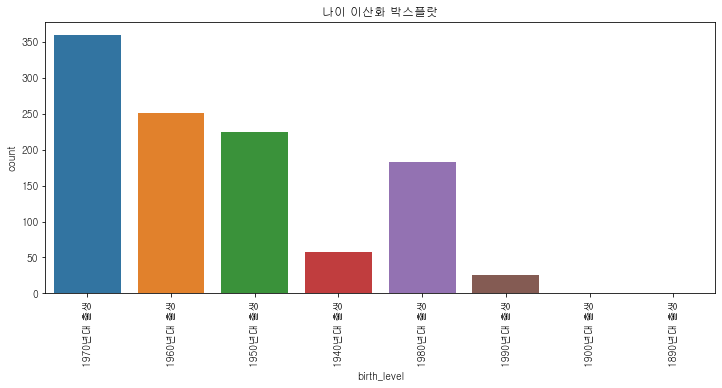

1900,1890,1940,1990 거의 없음 묶어주는게


In [149]:
# 많음, 이산화
plt.figure(figsize=(12,5))
sns.countplot(x='birth_level',data=a_del)
plt.xticks(rotation=90);plt.title('Year_Birth distribution')
plt.title('나이 이산화 박스플랏')
plt.show()
print('1900,1890,1940,1990 거의 없음 묶어주는게')

In [150]:
print(a_del['birth_level'].value_counts())

1970년대 출생    360
1960년대 출생    251
1950년대 출생    225
1980년대 출생    183
1940년대 출생     58
1990년대 출생     26
1900년대 출생      1
1890년대 출생      1
Name: birth_level, dtype: int64


In [151]:
a_del.loc[a_del.birth_level == '1890년대 출생', 'birth_level'] = 'others'
a_del.loc[a_del.birth_level == '1900년대 출생', 'birth_level']= 'others'
a_del.loc[a_del.birth_level == '1940년대 출생', 'birth_level'] = 'others'
a_del.loc[a_del.birth_level == '1990년대 출생', 'birth_level'] = 'others'
a_del['birth_level']

0       1970년대 출생
1       1960년대 출생
2       1950년대 출생
3       1970년대 출생
4          others
          ...    
1103    1950년대 출생
1104    1980년대 출생
1105    1970년대 출생
1106    1970년대 출생
1107    1950년대 출생
Name: birth_level, Length: 1105, dtype: object

In [152]:
a_del['birth_level'].unique()

array(['1970년대 출생', '1960년대 출생', '1950년대 출생', 'others', '1980년대 출생'],
      dtype=object)

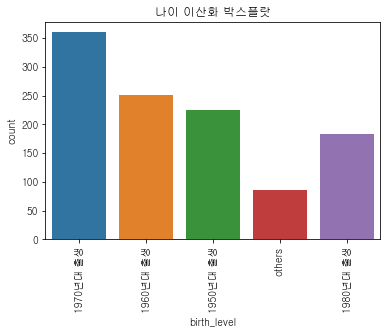

In [153]:
# 많음, 이산화

sns.countplot(x='birth_level',data=a_del)
plt.xticks(rotation=90);plt.title('Year_Birth distribution')
plt.title('나이 이산화 박스플랏')
plt.show()

In [154]:
pear_r,pear_pval = stats.kendalltau(a_del['income'],a_del['target'])
print(f'상관계수:{pear_r},유의확률:{pear_pval}')

상관계수:0.6624728675817441,유의확률:3.8552138566395597e-238


In [155]:
a_del.loc[a_del['dt_cus'] <= '2012-05-31', 'dt_group'] = '2012_half1'
a_del.loc[(a_del['dt_cus'] > '2012-05-31') & (a_del['dt_cus'] <= '2012-12-31'), 'dt_group'] = '2012_half2'
a_del.loc[(a_del['dt_cus'] > '2012-12-31') & (a_del['dt_cus'] <= '2013-05-31'), 'dt_group'] = '2013_half1'
a_del.loc[(a_del['dt_cus'] > '2013-05-31') & (a_del['dt_cus'] <= '2013-12-31'), 'dt_group'] = '2013_half2'
a_del.loc[(a_del['dt_cus'] > '2013-12-31') & (a_del['dt_cus'] <= '2014-5-31'), 'dt_group'] = '2014_half1'
a_del.loc[(a_del['dt_cus'] > '2014-05-31') & (a_del['dt_cus'] <= '2014-12-31'), 'dt_group'] = '2014_half2'

In [156]:
a_del['dt_group'].value_counts()

2013_half2    351
2013_half1    262
2012_half2    202
2014_half1    174
2014_half2     74
2012_half1     42
Name: dt_group, dtype: int64

In [157]:
dt_cmp = a_del[['dt_group', 'cmp1', 'cmp2', 'cmp3','cmp4','cmp5','response','target' ]]

In [158]:
dt_cmp['total_cmp'] = dt_cmp['cmp1'] + dt_cmp['cmp2'] + dt_cmp['cmp3'] + dt_cmp['cmp4'] + dt_cmp['cmp5']  + dt_cmp['response']

<ipython-input-158-447be7cc31a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_cmp['total_cmp'] = dt_cmp['cmp1'] + dt_cmp['cmp2'] + dt_cmp['cmp3'] + dt_cmp['cmp4'] + dt_cmp['cmp5']  + dt_cmp['response']


In [159]:
pi_cmp = dt_cmp.groupby('dt_group').sum()
pi_cmp.sort_values(by = ['target'],ascending = False)

,cmp1,cmp2,cmp3,cmp4,cmp5,response,target,total_cmp
dt_group,,,,,,,,
2013_half2,19,6,25,26,23,37,196241,136
2013_half1,22,4,20,18,20,41,178087,125
2012_half2,12,5,13,21,16,48,160398,115
2014_half1,14,2,13,14,15,18,88752,76
2014_half2,9,0,4,8,4,4,31885,29
2012_half1,0,0,2,8,2,9,28236,21


- 전체적으로 캠페인 참여가 높은 대로 소비량 또한 높은 것을 볼 수 있으며 cmp2는 낮은 참여율을 나타내고 있으므로
- 좋은 사례의 캠페인이라고는 볼 수 없다 그래서 뺀다

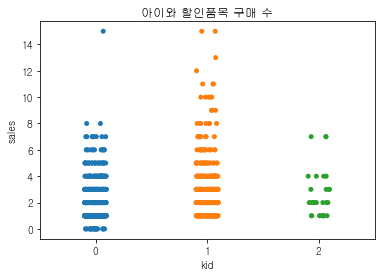

In [160]:
sns.stripplot(y = a_del['sales'],x = a_del['kid'])
plt.title('아이와 할인품목 구매 수')
plt.show()

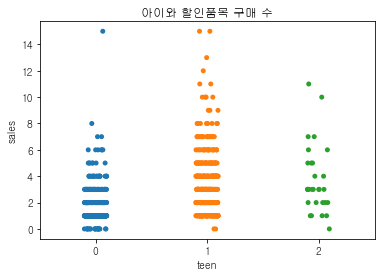

In [161]:
sns.stripplot(y = a_del['sales'],x = a_del['teen'])
plt.title('아이와 할인품목 구매 수')
plt.show()

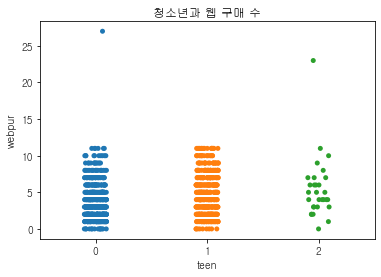

In [162]:
sns.stripplot(y = a_del['webpur'],x = a_del['teen'])
plt.title('청소년과 웹 구매 수')
plt.show()

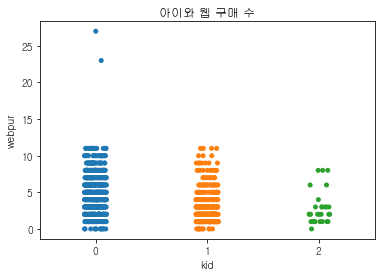

In [163]:
# 육아 중이면 바쁘니까 웹 구매횟수가 많지 않을까?
sns.stripplot(y = a_del['webpur'],x = a_del['kid'])
plt.title('아이와 웹 구매 수')
plt.show()

In [164]:
# 뭔가 전체적으로 분포도 비슷하고 0 1 2 값도 똑같고 그냥 보유자녀로 묶자 괜히 변수 갯수 늘리지 말고
a_del['parch'] = a_del['kid'] + a_del['teen']
print(a_del['parch'].head())

0    2
1    1
2    1
3    1
4    3
Name: parch, dtype: int64


In [165]:
# In[84]:
print(pd.pivot_table(a_del,
    index = ['kid'],
    values = ['target'],
    aggfunc = ['count']))

     count
    target
kid       
0      660
1      416
2       29


In [166]:
# In[84]:
print(pd.pivot_table(a_del,
    index = ['teen'],
    values = ['target'],
    aggfunc = ['count']))

      count
     target
teen       
0       569
1       506
2        30


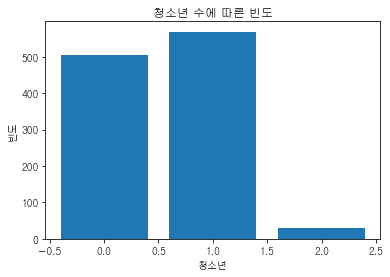

In [167]:
plt.bar(a_del['teen'].unique(),a_del['teen'].value_counts())
plt.xlabel('청소년')
plt.ylabel('빈도')
plt.title('청소년 수에 따른 빈도')
plt.show()

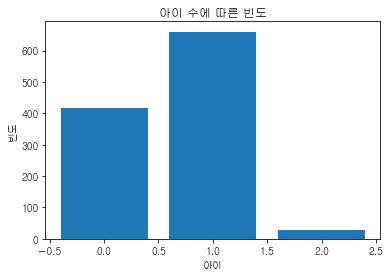

In [168]:
plt.bar(a_del['kid'].unique(),a_del['kid'].value_counts())
plt.xlabel('아이')
plt.ylabel('빈도')
plt.title('아이 수에 따른 빈도')
plt.show()

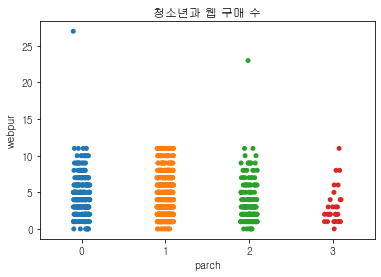

In [169]:
sns.stripplot(y = a_del['webpur'],x = a_del['parch'])
plt.title('청소년과 웹 구매 수')
plt.show()

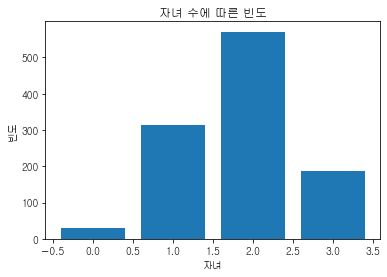

In [170]:
plt.bar(a_del['parch'].unique(),a_del['parch'].value_counts())
plt.xlabel('자녀')
plt.ylabel('빈도')
plt.title('자녀 수에 따른 빈도')
plt.show()

In [171]:
# In[84]:
print(pd.pivot_table(a_del,
    index = ['parch'],
    values = ['target'],
    aggfunc = ['count']))

       count
      target
parch       
0        315
1        571
2        188
3         31


- 전체적으로 아이나 청소년 수가 적을수록 소비량이 많음
- 그리고 아이나 청소년 수의 분포가 비슷해서 그냥 합쳐서 파생변수 만들어서 분석 진행해도 될듯

In [172]:
# 결혼상태 각 개수 파악
print(a_del['maritial'].value_counts()) 

Married     415
Together    294
Single      234
Divorced    119
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: maritial, dtype: int64


In [173]:
# 결혼상태 각 개수 파악
print(a_del['maritial'].value_counts()) 

Married     415
Together    294
Single      234
Divorced    119
Widow        39
Alone         2
YOLO          1
Absurd        1
Name: maritial, dtype: int64


In [174]:
a_del.columns

Index(['id', 'birth', 'edu', 'maritial', 'income', 'kid', 'teen', 'dt_cus',
       'recency', 'sales', 'webpur', 'catalog', 'store', 'cmp3', 'cmp4',
       'cmp5', 'cmp1', 'cmp2', 'complain', 'response', 'target', 'birth_level',
       'dt_group', 'parch'],
      dtype='object')

In [76]:
a_del.shape

(1105, 18)

In [176]:
a_del.dtypes

id                      int64
birth                   int64
edu                  category
maritial             category
income                float64
kid                     int64
teen                    int64
dt_cus         datetime64[ns]
recency                 int64
sales                   int64
webpur                  int64
catalog                 int64
store                   int64
cmp3                 category
cmp4                 category
cmp5                 category
cmp1                 category
cmp2                    int64
complain             category
response             category
target                  int64
birth_level          category
dt_group             category
parch                   int64
dtype: object

# 포아송 회귀분석
- 지수분포족 형태를 하고 있으며 2년이내에 소비한 횟수이므로 단위시간당 시행횟수인 포아송분포를 이용한 분석방법이 필요하다고 판단
- 포아송분포를 사용하기 위한 검정을 끝냈음
- 회귀식 유의성 검정하고 식 세우고
- 이런 식이 세워졌습니다 하고
- 해석 좀  해주고 

# 모델링 
- 모델링 좀 해주고 
- 결과 및 해석 
- 모델 개선

In [249]:
a_del_dum = pd.get_dummies(a_del[['cmp1','cmp3','cmp4','cmp5','response','edu','maritial','birth_level','dt_group','complain']],drop_first = True)
aaa = pd.concat([a_del,a_del_dum],axis = 1)
aaa.head(10)

,id,birth,edu,maritial,income,kid,teen,dt_cus,recency,sales,...,birth_level_1960년대 출생,birth_level_1970년대 출생,birth_level_1980년대 출생,birth_level_others,dt_group_2012_half2,dt_group_2013_half1,dt_group_2013_half2,dt_group_2014_half1,dt_group_2014_half2,complain_1
0,0,1974,Master,Together,46014.0,1,1,2013-01-21,21,10,...,0,1,0,0,0,1,0,0,0,0
1,1,1962,Graduation,Single,76624.0,0,1,2014-05-24,68,1,...,1,0,0,0,0,0,0,1,0,0
2,2,1951,Graduation,Married,75903.0,0,1,2013-08-04,50,2,...,0,0,0,0,0,0,1,0,0,0
3,3,1974,Basic,Married,18393.0,1,0,2014-03-29,2,2,...,0,1,0,0,0,0,0,1,0,0
4,4,1946,PhD,Together,64014.0,2,1,2014-10-06,56,7,...,0,0,0,1,0,0,0,0,1,0
5,5,1952,Graduation,Single,47958.0,0,1,2013-01-19,8,2,...,0,0,0,0,0,1,0,0,0,0
6,6,1971,Graduation,Single,22804.0,1,0,2013-07-31,75,1,...,0,1,0,0,0,0,1,0,0,0
7,7,1978,Graduation,Widow,54162.0,1,1,2013-03-18,31,1,...,0,1,0,0,0,1,0,0,0,0
8,8,1968,Graduation,Married,45688.0,0,1,2014-01-25,20,2,...,1,0,0,0,0,0,0,1,0,0
9,9,1952,Graduation,Single,61823.0,0,1,2013-02-18,26,4,...,0,0,0,0,0,1,0,0,0,0


In [334]:
tt.columns

Index(['id', 'birth', 'edu', 'maritial', 'income', 'kid', 'teen', 'dt_cus',
       'recency', 'sales', 'webpur', 'catalog', 'store', 'cmp3', 'cmp4',
       'cmp5', 'cmp1', 'cmp2', 'complain', 'response', 'birth_level',
       'dt_group', 'parch'],
      dtype='object')

In [251]:
aaa = aaa.drop(['id','birth','kid','teen','dt_cus','cmp2','birth_level','dt_group','maritial','edu','cmp1','cmp3','cmp4','cmp5','response','complain'], axis = 1 )

In [ ]:
a_del_dum = pd.get_dummies(a_del[['cmp1','cmp3','cmp4','cmp5','response','edu','maritial','birth_level','dt_group','complain']],drop_first = True)
aaa = pd.concat([a_del,a_del_dum],axis = 1)
aaa.head(10)

In [252]:
aaa.dtypes

income                   float64
recency                    int64
sales                      int64
webpur                     int64
catalog                    int64
store                      int64
target                     int64
parch                      int64
cmp1_1                     uint8
cmp3_1                     uint8
cmp4_1                     uint8
cmp5_1                     uint8
response_1                 uint8
edu_Basic                  uint8
edu_Graduation             uint8
edu_Master                 uint8
edu_PhD                    uint8
maritial_Alone             uint8
maritial_Divorced          uint8
maritial_Married           uint8
maritial_Single            uint8
maritial_Together          uint8
maritial_Widow             uint8
maritial_YOLO              uint8
birth_level_1960년대 출생      uint8
birth_level_1970년대 출생      uint8
birth_level_1980년대 출생      uint8
birth_level_others         uint8
dt_group_2012_half2        uint8
dt_group_2013_half1        uint8
dt_group_2

In [333]:
aaa.shape

(1105, 34)

In [253]:
from sklearn.model_selection import train_test_split
target = aaa['target']

# 회귀트리

In [259]:
 #필요없는 id열 삭제
train_data, val_data = train_test_split(aaa, test_size=0.2) #20프로로 설정
train_data.reset_index(inplace=True) #전처리 과정에서 데이터가 뒤섞이지 않도록 인덱스를 초기화
val_data.reset_index(inplace=True)

In [260]:
print('학습시킬 train 셋 : ', train_data.shape)
print('검증할 val 셋 : ', val_data.shape)

학습시킬 train 셋 :  (884, 35)
검증할 val 셋 :  (221, 35)


In [261]:
train_data_X = train_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
train_data_Y = train_data.target #training 데이터에서 소비량 추출

In [265]:
val_data_X = val_data.drop(['target', 'index'], axis = 1) #training 데이터에서 피쳐 추출
val_data_Y = val_data.target #training 데이터에서 소비량 추출

In [266]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_data_X,train_data_Y)

DecisionTreeRegressor()

In [271]:
predd = tree_reg.predict(val_data_X)
predd

array([1415.,   20., 1511.,   57., 2053.,  121., 1919.,  102.,  908.,
        563.,  332.,   43.,  137., 2252., 1565., 1232.,  279.,   63.,
       1497.,   44.,  275.,  641.,  877.,  605.,  191.,  362.,   28.,
        100.,  306., 1598.,  797.,   25.,  813.,  137., 1199.,   24.,
        137.,  306., 1141., 1540.,  317.,   35.,  315., 1382.,  470.,
         43.,  306.,  470.,  155., 1226.,  424., 1293.,  450., 1135.,
         49.,  542.,   35., 1586.,   50.,  597.,   37., 1127.,  102.,
         49.,  195.,  416.,  778.,   38.,  586.,  802.,  424.,   13.,
        928.,   20., 1024.,   77., 1380.,  421., 2008.,   15.,  978.,
       1724.,   40.,  642.,  101.,   42.,   16.,  279.,  732.,   20.,
        187.,   46.,  219.,  182., 1241.,   88.,  393., 1237.,  318.,
         71.,  102.,  165., 1370., 1453.,  575.,   39.,  135.,  362.,
        960., 1383., 1232., 1045.,   53.,  119.,  240.,   54., 1782.,
       2440.,  416., 2440., 1380.,   60.,  882., 1092., 1064.,  938.,
         45., 1644.,

In [277]:
from sklearn.metrics import mean_squared_error 
tree_mse = mean_squared_error(val_data_Y,predd)
tree_rmse = np.sqrt(tree_mse)
print(f'rmse:{tree_rmse}')

rmse:339.05762400835357


In [278]:
from sklearn.metrics import mean_absolute_error
tree_mae = mean_absolute_error(val_data_Y,predd)
print(f'mae:{tree_mae}')

mae:174.1266968325792


In [276]:
a_del['target'].describe()

count    1105.000000
mean      618.641629
std       603.696918
min         6.000000
25%        71.000000
50%       415.000000
75%      1071.000000
max      2525.000000
Name: target, dtype: float64

In [275]:
tree_mse

114960.07239819005

In [286]:
train_data_X = aaa.drop(['target'], axis = 1) #training 데이터에서 피쳐 추출
train_data_Y = aaa['target'] #training 데이터에서 소비량 추출

In [332]:
aaa.shape()

TypeError: 'tuple' object is not callable

# 랜덤포레스트회귀

In [287]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_data_X,train_data_Y)

RandomForestRegressor()

- 매개변수 조합

In [288]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]},
]

In [289]:
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring='neg_mean_absolute_error',
                          return_train_score = True)
grid_search.fit(train_data_X,train_data_Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [290]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [87]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

In [283]:
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

In [280]:
test_1 = pd.read_csv("test123.csv")
test_1.head()

,id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,1979,Graduation,Single,57537.0,1,0,10-06-2013,83,4,...,3,8,4,0,0,0,0,0,0,0
1,1,1955,Graduation,Together,65748.0,0,1,15-04-2013,58,2,...,4,10,1,0,0,0,0,0,1,0
2,2,1984,Graduation,Married,55434.0,1,0,05-10-2013,21,3,...,3,13,4,0,0,0,0,0,0,0
3,3,1960,Graduation,Married,67716.0,0,1,10-01-2013,8,4,...,4,13,5,0,1,0,0,0,0,0
4,4,1976,Graduation,Together,85606.0,0,1,12-11-2012,89,2,...,7,9,3,0,0,0,1,0,0,0


In [295]:
test_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1108 non-null   int64  
 1   birth     1108 non-null   int64  
 2   edu       1108 non-null   object 
 3   maritial  1108 non-null   object 
 4   income    1108 non-null   float64
 5   kid       1108 non-null   int64  
 6   teen      1108 non-null   int64  
 7   dt_cus    1108 non-null   object 
 8   recency   1108 non-null   int64  
 9   sales     1108 non-null   int64  
 10  webpur    1108 non-null   int64  
 11  catalog   1108 non-null   int64  
 12  store     1108 non-null   int64  
 13  webvisit  1108 non-null   int64  
 14  cmp3      1108 non-null   int64  
 15  cmp4      1108 non-null   int64  
 16  cmp5      1108 non-null   int64  
 17  cmp1      1108 non-null   int64  
 18  cmp2      1108 non-null   int64  
 19  complain  1108 non-null   int64  
 20  response  1108 non-null   int6

In [296]:
test_1.columns = ['id','birth','edu','maritial','income','kid','teen','dt_cus','recency','sales',
             'webpur','catalog','store','webvisit','cmp3','cmp4','cmp5','cmp1','cmp2',
             'complain','response']

In [313]:
tt = test_1.copy()
#tt = tt[tt['income']<117159.75]
tt=tt.drop(['webvisit'],axis=1)
tt.shape

(1108, 20)

In [314]:
tt['dt_cus'] = pd.to_datetime(tt['dt_cus'])

In [315]:
conditionlist = [
    (tt['birth'] >= 1890) & (tt['birth'] < 1900),
    (tt['birth'] >= 1900) & (tt['birth'] < 1910),
    (tt['birth'] >= 1910) & (tt['birth'] < 1920),
    (tt['birth'] >= 1920) & (tt['birth'] < 1930),
    (tt['birth'] >= 1930) & (tt['birth'] < 1940),
    (tt['birth'] >= 1940) & (tt['birth'] < 1950),
    (tt['birth'] >= 1950) & (tt['birth'] < 1960),
    (tt['birth'] >= 1960) & (tt['birth'] < 1970),
    (tt['birth'] >= 1970) & (tt['birth'] < 1980),
    (tt['birth'] >= 1980) & (tt['birth'] < 1990),
    (tt['birth'] >= 1990) & (tt['birth'] < 2000)]
choicelist = ['1890년대 출생', '1900년대 출생','1910년대 출생','1920년대 출생','1930년대 출생',
              '1940년대 출생','1950년대 출생','1960년대 출생','1970년대 출생','1980년대 출생',
              '1990년대 출생']
tt['birth_level'] = np.select(conditionlist, choicelist,default=0)
print(tt.head())

   id  birth         edu  maritial   income  kid  teen     dt_cus  recency  \
0   0   1979  Graduation    Single  57537.0    1     0 2013-10-06       83   
1   1   1955  Graduation  Together  65748.0    0     1 2013-04-15       58   
2   2   1984  Graduation   Married  55434.0    1     0 2013-05-10       21   
3   3   1960  Graduation   Married  67716.0    0     1 2013-10-01        8   
4   4   1976  Graduation  Together  85606.0    0     1 2012-12-11       89   

   sales  ...  catalog  store  cmp3  cmp4  cmp5  cmp1  cmp2  complain  \
0      4  ...        3      8     0     0     0     0     0         0   
1      2  ...        4     10     0     0     0     0     0         1   
2      3  ...        3     13     0     0     0     0     0         0   
3      4  ...        4     13     0     1     0     0     0         0   
4      2  ...        7      9     0     0     0     1     0         0   

   response  birth_level  
0         0    1970년대 출생  
1         0    1950년대 출생  
2         0

In [316]:
tt.loc[tt.birth_level == '1890년대 출생', 'birth_level'] = 'others'
tt.loc[tt.birth_level == '1900년대 출생', 'birth_level']= 'others'
tt.loc[tt.birth_level == '1940년대 출생', 'birth_level'] = 'others'
tt.loc[tt.birth_level == '1990년대 출생', 'birth_level'] = 'others'
tt['birth_level']

0       1970년대 출생
1       1950년대 출생
2       1980년대 출생
3       1960년대 출생
4       1970년대 출생
          ...    
1103    1950년대 출생
1104    1960년대 출생
1105    1980년대 출생
1106    1970년대 출생
1107    1970년대 출생
Name: birth_level, Length: 1108, dtype: object

In [317]:
tt['dt_cus']

0      2013-10-06
1      2013-04-15
2      2013-05-10
3      2013-10-01
4      2012-12-11
          ...    
1103   2014-03-01
1104   2014-03-23
1105   2013-11-09
1106   2013-08-04
1107   2012-08-18
Name: dt_cus, Length: 1108, dtype: datetime64[ns]

In [318]:
tt.loc[tt['dt_cus'] <= '2012-05-31', 'dt_group'] = '2012_half1'
tt.loc[(tt['dt_cus'] > '2012-05-31') & (tt['dt_cus'] <= '2012-12-31'), 'dt_group'] = '2012_half2'
tt.loc[(tt['dt_cus'] > '2012-12-31') & (tt['dt_cus'] <= '2013-05-31'), 'dt_group'] = '2013_half1'
tt.loc[(tt['dt_cus'] > '2013-05-31') & (tt['dt_cus'] <= '2013-12-31'), 'dt_group'] = '2013_half2'
tt.loc[(tt['dt_cus'] > '2013-12-31') & (tt['dt_cus'] <= '2014-5-31'), 'dt_group'] = '2014_half1'
tt.loc[(tt['dt_cus'] > '2014-05-31') & (tt['dt_cus'] <= '2014-12-31'), 'dt_group'] = '2014_half2'

In [325]:
tt['parch'] = tt['kid'] + tt['teen']
print(tt['parch'].head())

0    1
1    1
2    1
3    1
4    1
Name: parch, dtype: int64


In [ ]:
a_del_dum = pd.get_dummies(a_del[['cmp1','cmp3','cmp4','cmp5','response','edu','maritial','birth_level','dt_group','complain']],drop_first = True)
aaa = pd.concat([a_del,a_del_dum],axis = 1)
aaa.head(10)

In [326]:
tt_dum = pd.get_dummies(tt[['cmp1','cmp3','cmp4','cmp5','response','edu','maritial','birth_level','dt_group','complain']],drop_first = True)
ttt = pd.concat([tt,tt_dum],axis = 1)
ttt.head(10)

,id,birth,edu,maritial,income,kid,teen,dt_cus,recency,sales,...,maritial_YOLO,birth_level_1960년대 출생,birth_level_1970년대 출생,birth_level_1980년대 출생,birth_level_others,dt_group_2012_half2,dt_group_2013_half1,dt_group_2013_half2,dt_group_2014_half1,dt_group_2014_half2
0,0,1979,Graduation,Single,57537.0,1,0,2013-10-06,83,4,...,0,0,1,0,0,0,0,1,0,0
1,1,1955,Graduation,Together,65748.0,0,1,2013-04-15,58,2,...,0,0,0,0,0,0,1,0,0,0
2,2,1984,Graduation,Married,55434.0,1,0,2013-05-10,21,3,...,0,0,0,1,0,0,1,0,0,0
3,3,1960,Graduation,Married,67716.0,0,1,2013-10-01,8,4,...,0,1,0,0,0,0,0,1,0,0
4,4,1976,Graduation,Together,85606.0,0,1,2012-12-11,89,2,...,0,0,1,0,0,1,0,0,0,0
5,5,1975,Graduation,Widow,58330.0,0,1,2013-12-25,87,1,...,0,0,1,0,0,0,0,1,0,0
6,6,1973,Graduation,Married,31814.0,1,0,2013-09-02,73,2,...,0,0,1,0,0,0,0,1,0,0
7,7,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,3,...,0,0,0,0,0,0,0,0,0,0
8,8,1977,Graduation,Married,72117.0,0,1,2013-08-20,34,1,...,0,0,1,0,0,0,0,1,0,0
9,9,1975,Master,Together,17459.0,1,0,2013-09-19,12,3,...,0,0,1,0,0,0,0,1,0,0


In [335]:
ttt.shape

(1108, 27)

In [327]:
ttt = ttt.drop(['id','birth','kid','teen','dt_cus','cmp2','birth_level','dt_group','maritial','edu','cmp1','cmp3','cmp4','cmp5','response','complain'], axis = 1 )

In [328]:
ttt.shape

(1108, 27)

In [330]:
forest_reg.fit(train_data_X,train_data_Y)

RandomForestRegressor()

In [ ]:
abcd = pd.DataFrame(forest_reg.predict(ttt))